In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings

In [4]:
# load data and check 
chunksize = 10 ** 6
for chunk in pd.read_csv('D:\\Courses\\2nd Year\\4.Data Science\\-Sp-Data_Science_2019501125\\Intro to ML\\kaggle-2\\new-york-city-taxi-fare-prediction (1)\\train.csv', chunksize=chunksize, parse_dates=['pickup_datetime']):
     train = chunk
     break

#train = pd.read_csv('train.csv')
test = pd.read_csv('D:\\Courses\\2nd Year\\4.Data Science\\-Sp-Data_Science_2019501125\\Intro to ML\\kaggle-2\\new-york-city-taxi-fare-prediction (1)\\test.csv')
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


Text(0, 0.5, 'n of records')

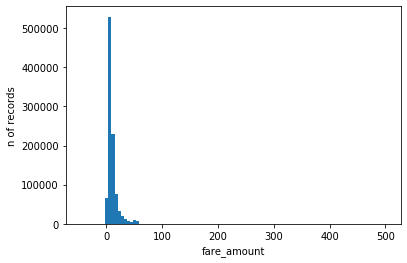

In [5]:
#plotting
plt.hist(train['fare_amount'].values, bins = 100)
plt.xlabel("fare_amount")
plt.ylabel('n of records')

In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [7]:
# those should be obvious mistakes, and since the dataset is quite large, removal seems alright
train = train[(train['fare_amount'] > 0) & (train['passenger_count'] > 0)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996368.000000,996368.000000,996368.000000,996368.000000,996368.000000,996368.000000
mean,11.358160,-72.525955,39.928542,-72.527644,39.919709,1.690967
std,9.831082,12.066026,7.633386,11.328896,8.209539,1.322442
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000
25%,6.000000,-73.992060,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768128,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


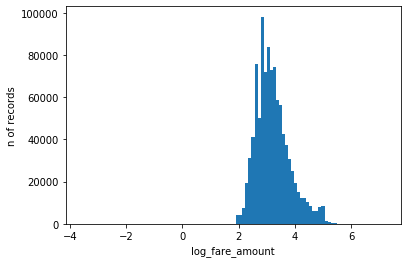

In [8]:
# log - different view if the price paid
#train.dropna(inplace=True)
warnings.filterwarnings('ignore')
train['log_fair_amount'] = np.log(train['fare_amount']) + 1

plt.hist(train['log_fair_amount'].values, bins = 100)
plt.xlabel("log_fare_amount")
plt.ylabel('n of records')
plt.show()

Text(0, 0.5, 'n of records')

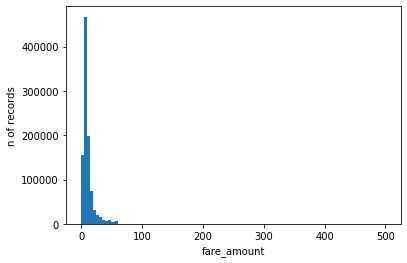

In [9]:
plt.hist(train['fare_amount'].values, bins = 100)
plt.xlabel("fare_amount")
plt.ylabel('n of records')

Text(0, 0.5, 'number of records')

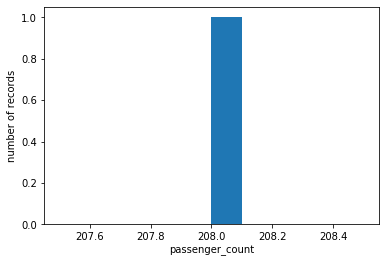

In [10]:
plt.hist(train.loc[train['passenger_count'] > 6,'passenger_count'].values)
plt.xlabel('passenger_count')
plt.ylabel('number of records')

In [11]:
train = train[train['passenger_count'] < 6]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000,975172.000000
mean,11.338706,-72.524155,39.928774,-72.528042,39.921227,1.597100,3.213933
std,9.821863,12.079817,7.648459,11.320461,8.232060,1.153622,0.601504
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992062,40.734950,-73.991384,40.734057,1.000000,2.791759
50%,8.500000,-73.981794,40.752692,-73.980137,40.753168,1.000000,3.140066
75%,12.500000,-73.967100,40.767146,-73.963660,40.768127,2.000000,3.525729
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,5.000000,7.214608


In [12]:
train = train[(train['pickup_longitude'] <= -70) & (train['dropoff_longitude'] >= -75)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000,956081.000000
mean,11.326327,-73.982928,40.752184,-73.908013,40.718451,1.597216,3.213833
std,9.763111,2.474787,0.946627,2.208313,3.914893,1.153433,0.600367
min,0.010000,-1452.988333,0.000000,-74.996513,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992275,40.736551,-73.991563,40.735507,1.000000,2.791759
50%,8.500000,-73.982084,40.753402,-73.980570,40.753842,1.000000,3.140066
75%,12.500000,-73.968315,40.767569,-73.965244,40.768405,2.000000,3.525729
max,500.000000,-70.140793,424.083332,45.581619,1651.553433,5.000000,7.214608


In [13]:
train = train[(train['pickup_latitude'] >= -35) & (train['dropoff_latitude'] <= 45)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount
count,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000,956070.000000
mean,11.326278,-73.982927,40.752180,-73.908203,40.714399,1.597217,3.213828
std,9.763116,2.474802,0.946622,2.205475,3.432063,1.153432,0.600366
min,0.010000,-1452.988333,0.000000,-74.996513,-3114.338567,1.000000,-3.605170
25%,6.000000,-73.992275,40.736551,-73.991563,40.735507,1.000000,2.791759
50%,8.500000,-73.982084,40.753402,-73.980571,40.753842,1.000000,3.140066
75%,12.500000,-73.968315,40.767569,-73.965244,40.768405,2.000000,3.525729
max,500.000000,-70.140793,424.083332,45.581619,44.600000,5.000000,7.214608


In [14]:
train['abs_longtitude_diff'] = (train['pickup_longitude'] - train['dropoff_longitude']).abs()
train['abs_latitude_diff'] = (train['pickup_latitude'] - train['dropoff_latitude']).abs()
train = train[(train['abs_longtitude_diff'] <= 1) & (train['abs_latitude_diff'] <= 1)]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount,abs_longtitude_diff,abs_latitude_diff
count,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000,954986.000000
mean,11.320696,-73.975100,40.751016,-73.974205,40.751355,1.597361,3.213752,0.022788,0.021321
std,9.733378,0.040907,0.031883,0.040145,0.034900,1.153569,0.599862,0.035241,0.024233
min,0.010000,-75.034685,38.689556,-74.996513,38.684359,1.000000,-3.605170,0.000000,0.000000
25%,6.000000,-73.992275,40.736559,-73.991573,40.735585,1.000000,2.791759,0.006125,0.006927
50%,8.500000,-73.982085,40.753407,-73.980593,40.753876,1.000000,3.140066,0.012695,0.014154
75%,12.500000,-73.968320,40.767571,-73.965326,40.768417,2.000000,3.525729,0.023911,0.027173
max,500.000000,-70.257668,43.098708,-70.050500,43.415190,5.000000,7.214608,0.939292,0.880962


In [15]:
(train.loc[:,['fare_amount', 'passenger_count', 'abs_longtitude_diff', 'abs_latitude_diff']]).corr()

,fare_amount,passenger_count,abs_longtitude_diff,abs_latitude_diff
fare_amount,1.000000,0.006968,0.767909,0.634668
passenger_count,0.006968,1.000000,0.007082,0.007277
abs_longtitude_diff,0.767909,0.007082,1.000000,0.574688
abs_latitude_diff,0.634668,0.007277,0.574688,1.000000


In [16]:
featues = list(train.columns)
features = ['fare_amount', 'abs_longtitude_diff', 'abs_latitude_diff']
X = train[features]
y = X.pop('fare_amount')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.646471177131579

In [18]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'log_fair_amount', 'abs_longtitude_diff',
       'abs_latitude_diff'],
      dtype='object')

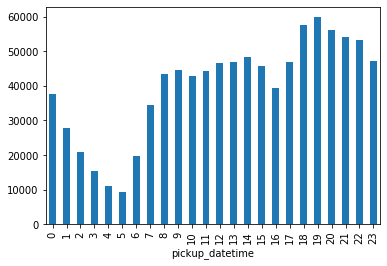

In [19]:
train.groupby([ train["pickup_datetime"].dt.hour])['pickup_datetime'].count().plot(kind="bar")

In [20]:
# create "rush-hours coeficient"
train['hour'] = train["pickup_datetime"].dt.hour
train['year'] = train["pickup_datetime"].dt.year
train['rush'] = np.where(train["pickup_datetime"].dt.hour <= 7, 1, np.where(train["pickup_datetime"].dt.hour <= 17, 2,3))

In [21]:
train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fair_amount,abs_longtitude_diff,abs_latitude_diff,hour,year,rush
fare_amount,1.000000,0.355634,-0.173445,0.271789,-0.144056,0.006968,0.892713,0.767909,0.634668,-0.019461,0.115908,-0.031730
pickup_longitude,0.355634,1.000000,0.159060,0.464185,0.160494,-0.001366,0.269476,0.451423,0.257613,0.016865,0.001517,0.004328
pickup_latitude,-0.173445,0.159060,1.000000,0.179934,0.535984,-0.007835,-0.146864,-0.129984,-0.112478,0.025754,-0.017583,0.021856
dropoff_longitude,0.271789,0.464185,0.179934,1.000000,0.243935,-0.001821,0.241010,0.348360,0.192583,-0.039415,-0.001198,-0.053404
dropoff_latitude,-0.144056,0.160494,0.535984,0.243935,1.000000,-0.004682,-0.132230,-0.102974,-0.091673,0.017842,-0.009905,0.010559
passenger_count,0.006968,-0.001366,-0.007835,-0.001821,-0.004682,1.000000,0.009821,0.007082,0.007277,0.019983,-0.048649,0.020044
log_fair_amount,0.892713,0.269476,-0.146864,0.241010,-0.132230,0.009821,1.000000,0.675722,0.653603,-0.015466,0.142383,-0.021160
abs_longtitude_diff,0.767909,0.451423,-0.129984,0.348360,-0.102974,0.007082,0.675722,1.000000,0.574688,-0.028461,0.021700,-0.043663
abs_latitude_diff,0.634668,0.257613,-0.112478,0.192583,-0.091673,0.007277,0.653603,0.574688,1.000000,-0.022256,0.011341,-0.027947
hour,-0.019461,0.016865,0.025754,-0.039415,0.017842,0.019983,-0.015466,-0.028461,-0.022256,1.000000,0.002341,0.923780


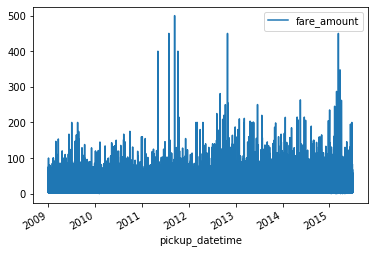

In [22]:
train.plot("pickup_datetime", y='fare_amount')

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['year_standardized'] = scaler.fit_transform(train["pickup_datetime"].dt.year.values.reshape(-1, 1))
train['year_standardized']

0        -1.453703
1        -0.917901
2        -0.382099
3         0.153703
4        -0.917901
            ...   
999995    1.225307
999996   -0.917901
999997    0.689505
999998   -0.382099
999999   -1.453703
Name: year_standardized, Length: 954986, dtype: float64

In [24]:
featues = list(train.columns)
features = ['fare_amount', 'abs_longtitude_diff', 'abs_latitude_diff', 'year_standardized']
X = train[features]
y = X.pop('fare_amount')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.6569382029214739

In [26]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = KNeighborsRegressor()
neighbors.fit(X_train, y_train)
neighbors.score(X_test, y_test)

0.7687877803744321

In [28]:
to_predict = pd.read_csv('D:\\Courses\\2nd Year\\4.Data Science\\-Sp-Data_Science_2019501125\\Intro to ML\\kaggle-2\\new-york-city-taxi-fare-prediction (1)\\test.csv', parse_dates=['pickup_datetime'])
to_predict.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [29]:
X_train.head()

,abs_longtitude_diff,abs_latitude_diff,year_standardized
795070,0.006742,0.023665,0.689505
452319,0.011000,0.025100,-0.382099
361104,0.009246,0.002475,-1.453703
730193,0.046616,0.046370,0.689505
492149,0.002405,0.016875,-0.382099


In [30]:
to_predict['abs_longtitude_diff'] = (to_predict['pickup_longitude'] - to_predict['dropoff_longitude']).abs()
to_predict['abs_latitude_diff'] = (to_predict['pickup_latitude'] - to_predict['dropoff_latitude']).abs()

In [31]:
to_predict['year_standardized'] = scaler.fit_transform(to_predict["pickup_datetime"].dt.year.values.reshape(-1, 1))
to_predict.drop(["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"], axis=1, inplace=True)
to_predict.head()

,key,abs_longtitude_diff,abs_latitude_diff,year_standardized
0,2015-01-27 13:08:24.0000002,0.008110,0.019970,1.765797
1,2015-01-27 13:08:24.0000003,0.012024,0.019817,1.765797
2,2011-10-08 11:53:44.0000002,0.002870,0.005121,-0.452413
3,2012-12-01 21:12:12.0000002,0.009288,0.016172,0.102140
4,2012-12-01 21:12:12.0000003,0.022519,0.045348,0.102140


In [32]:
key = to_predict.pop('key')
predictions = neighbors.predict(to_predict)

In [33]:
to_submit = pd.DataFrame({'key': key, 'fare_amount': predictions},columns = ['key', 'fare_amount'])
to_submit.to_csv("D:\\Courses\\2nd Year\\4.Data Science\\-Sp-Data_Science_2019501125\\Intro to ML\\kaggle-2\\new-york-city-taxi-fare-prediction (1)\\finalsubmit.csv", index=False)
to_submit.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.40
1,2015-01-27 13:08:24.0000003,10.20
2,2011-10-08 11:53:44.0000002,5.38
3,2012-12-01 21:12:12.0000002,7.14
4,2012-12-01 21:12:12.0000003,13.22
